# CAPSTONE PROJECT ON ATTRITION 

Problem Statement:  Within the context of human resources (HR), attrition is a reduction in the workforce caused by retirement or resignation. This is a serious problem faced by several organizations around the world as attrition is economically damaging to the organizations as the replacement employees have to be hired at a cost and trained again at a cost. High Rates of Attrition also damages the brand value of the company. 
Now the Dataset belongs to a very fast-growing company. This company has witnessed several employees leaving the company in the last 3 years. The company’s HR team has always been reactive to attrition but now the team wants to be proactive and wished to predict attrition of employees using the data they have in hand. 
The goal here is to predict whether an employee will leave the company based upon the various variables given in the dataset.
Working with Data
Data has been split into two groups and provided in the module:
training set 
test set 
The training set is used to build your machine learning model. For the training set, we provide the attrition details of an employee.
The test set should be used to see how well your model performs on unseen data. For the test set, it is your job to predict the attrition value of an employee.

In [1]:
## Data Description
path = 'C:\\Users\\91983\\Downloads\\ML projects\\Project\\Data_Dictionary.csv'
with open(path,"r") as file:
    datadiscription = file.read()
print(datadiscription)

Variable,Description
EmployeeID,Unique employee code
Attrition,Attrition flag
Age,Age of employee
TravelProfile,Status of travel in job profile
Department,Department of employee
HomeToWork,Distance between home to work
EducationField,Field of education of an employee
Gender,Gender of an employee
HourlnWeek,Work hours of an employee in a week
Involvement,Involvement of any employee in engagement activity organised by HR team. 5 highest | 1 Lowest
WorklifeBalance,Work Life balance of an employee. 5 highest | 1 Lowest
Designation,Employee designation
JobSatisfaction,Score of employee opinion survey. 5 highest | 1 Lowest
ESOPS,Do the employess owns company’s ESOPs  1 Means Yes and 0 Means No
NumCompaniesWorked,Total number of company employee had worked in past
OverTime,Is employee is eligible to be paid for overtime
SalaryHikelastYear,Increment percent in last cycle
WorkExperience,Total year of work experience
LastPromotion,Year since last promotion
CurrentProfile,Year since in current pr

# Basic packages

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing train and test dataset seperately
df_train = pd.read_csv('Train_Dataset.csv')
df_test = pd.read_csv('Test_Dataset.csv')

In [4]:
df_train   ## Train data

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001,0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1,...,1,1,1,1,20.0,7.0,2.0,NaN,M,18932.0
1,5110002,1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4,...,2,0,8,0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003,0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5,...,2,1,3,0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004,0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3,...,4,1,1,0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005,0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3,...,4,1,8,0,21.0,12.0,1.0,9.0,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,5115176,0,36.0,Rarely,Analytics,13.0,CA,F,53.0,3,...,3,0,4,1,22.0,11.0,1.0,5.0,Single,22142.0
5176,5115177,0,NaN,Rarely,Marketing,9.0,CA,Female,66.0,1,...,4,1,9,0,23.0,8.0,0.0,2.0,Single,17109.0
5177,5115178,0,29.0,Rarely,Analytics,NaN,CA,Female,62.0,4,...,1,1,6,0,19.0,8.0,0.0,3.0,M,17532.0
5178,5115179,0,26.0,Rarely,Marketing,26.0,Statistics,Female,61.0,3,...,3,0,1,0,28.0,8.0,5.0,7.0,Divorsed,17942.0


In [5]:
df_test    ## Test data

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,6112626,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3,5,...,5,1,5,1,18.0,10.0,1.0,3.0,Married,26761.0
2626,6112627,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4,4,...,5,0,2,0,18.0,7.0,4.0,4.0,Divorsed,19196.0
2627,6112628,44.0,Rarely,Analytics,8.0,CA,F,42.0,4,1,...,1,1,3,0,19.0,24.0,5.0,17.0,Married,25248.0
2628,6112629,NaN,Rarely,Analytics,11.0,Statistics,Female,NaN,4,3,...,4,0,2,0,18.0,2.0,1.0,1.0,Single,17261.0


In [6]:
df_train.columns

Index(['EmployeeID', 'Attrition', 'Age', 'TravelProfile', 'Department',
       'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')

In [7]:
df_train.shape

(5180, 22)

In [8]:
df_test.columns

Index(['EmployeeID', 'Age', 'TravelProfile', 'Department', 'HomeToWork',
       'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')

In [9]:
df_test.shape

(2630, 21)

# Data Preprocessing

Here Attrition is missing in the test data so it is our dependent variable and rest of the variables are independet variable

In [10]:
print('number of duplicate rows present in the train dataset: ',df_train.duplicated().sum())  ## No duplicate data present

number of duplicate rows present in the train dataset:  0


In [11]:
df_train.shape

(5180, 22)

In [12]:
df_train.isnull().sum()  ## Null values are present in the train data 

EmployeeID              0
Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [13]:
df_test.isnull().sum()  ## Null values are present in the test data

EmployeeID              0
Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [14]:
df_test.info()  ## Checking basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

In [15]:
df_train.info()  ## Checking basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   int64  
 1   Attrition           5180 non-null   int64  
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   int64  
 10  WorkLifeBalance     5180 non-null   int64  
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   int64  
 13  ESOPs               5180 non-null   int64  
 14  NumCompaniesWorked  5180 non-null   int64  
 15  OverTime            5180 non-null   int64  
 16  Salary

In [16]:
df_train['EmployeeID'] = df_train['EmployeeID'].astype('int64')    #In the train data, employee ID is in float and in test data ID is in int, so we need to convert the dtyes
df_train['Attrition'] = df_train['Attrition'].astype('int64')

In [17]:
df_train['data_name']='train'  ## Adding train and test in both dataset to detect them after merging 
df_test['data_name']='test'

In [18]:
df_train.head(5)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,data_name
0,5110001,0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1,...,1,1,1,20.0,7.0,2.0,NaN,M,18932.0,train
1,5110002,1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4,...,0,8,0,20.0,4.0,1.0,NaN,Single,18785.0,train
2,5110003,0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5,...,1,3,0,26.0,12.0,1.0,3.0,Single,22091.0,train
3,5110004,0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3,...,1,1,0,23.0,5.0,1.0,3.0,Divorsed,20302.0,train
4,5110005,0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3,...,1,8,0,21.0,12.0,1.0,9.0,Divorsed,21674.0,train


In [19]:
df_test.head(5)

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,data_name
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0,test
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0,test
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,0,5,1,22.0,18.0,3.0,3.0,M,18587.0,test
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0,test
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0,test


In [20]:
data = pd.concat([df_train,df_test],axis=0)  ## Merging both train and test data

In [21]:
data.shape

(7810, 23)

In [22]:
data.isnull().sum()/len(data)*100    ## Here null values are present in the dataset 

EmployeeID             0.000000
Attrition             33.674776
Age                    5.864277
TravelProfile          0.000000
Department             2.330346
HomeToWork             4.878361
EducationField         0.000000
Gender                 0.973111
HourlnWeek             5.416133
Involvement            0.000000
WorkLifeBalance        0.000000
Designation            0.870679
JobSatisfaction        0.000000
ESOPs                  0.000000
NumCompaniesWorked     0.000000
OverTime               0.000000
SalaryHikelastYear     3.367478
WorkExperience         3.956466
LastPromotion          1.626120
CurrentProfile         5.697823
MaritalStatus          0.000000
MonthlyIncome          1.613316
data_name              0.000000
dtype: float64

In [23]:
data['Attrition'].value_counts()

0.0    3735
1.0    1445
Name: Attrition, dtype: int64

<Axes: >

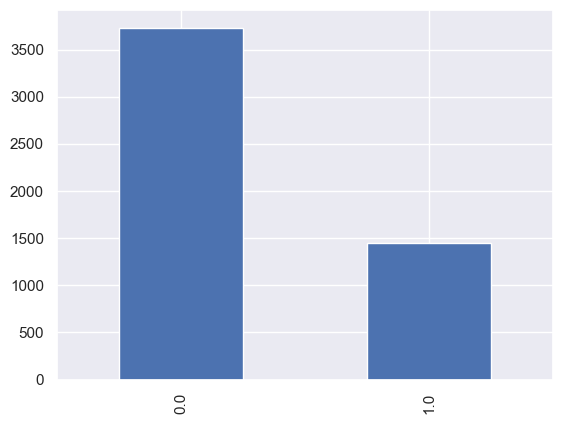

In [24]:
data['Attrition'].value_counts().plot(kind='bar')

In [25]:
data['Department'].value_counts()

Analytics    4894
Sales        2407
Marketing     327
Name: Department, dtype: int64

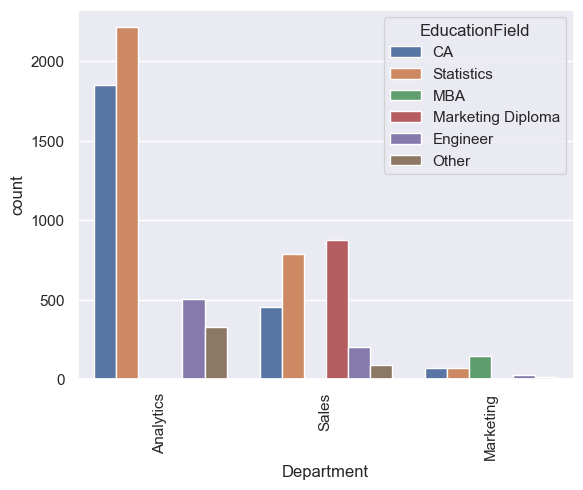

In [26]:
sns.countplot(x=data['Department'],hue=data['EducationField'])
plt.xticks(rotation=90)
plt.show()


The above graph explains that, in the analytics field majority of the employees are from statistics. In the sales and marketing department majorities are from marketing diploma and MBA respectively. 

In [27]:
data['EducationField'].value_counts()

Statistics           3169
CA                   2417
Marketing Diploma     894
Engineer              750
Other                 429
MBA                   151
Name: EducationField, dtype: int64

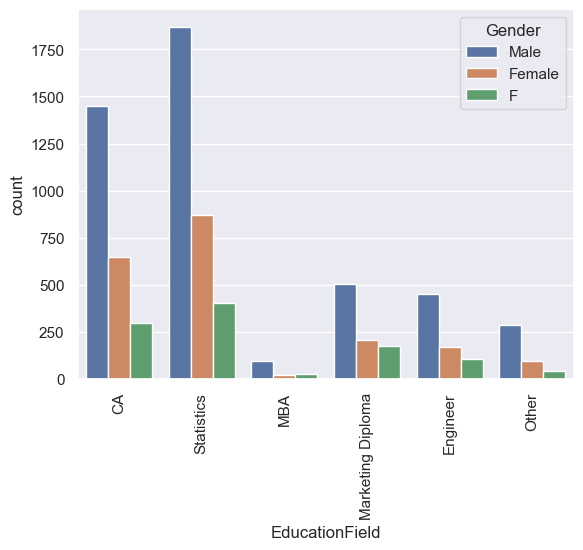

In [28]:
sns.countplot(x=data['EducationField'],hue=data['Gender'])
plt.xticks(rotation=90)
plt.show()

In every education field, majority of the candidates are male

In [29]:
data['Gender'].value_counts()  ## need to fix this 

Male      4668
Female    2020
F         1046
Name: Gender, dtype: int64

<Axes: >

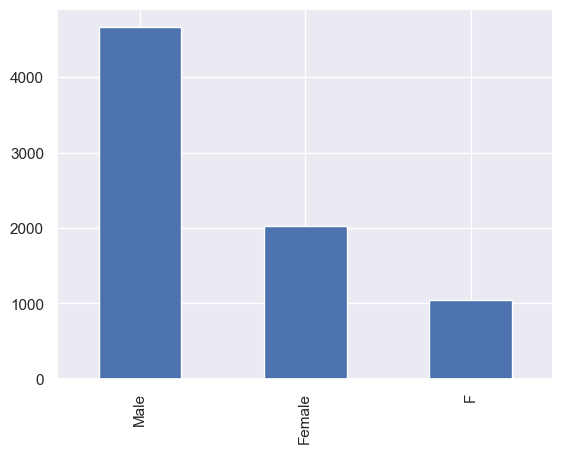

In [30]:
data['Gender'].value_counts().plot(kind='bar')

In [31]:
data['Gender'] = data['Gender'].replace('F','Female')  ## F and Female are same so we need to replace 'F' with 'Female'

<Axes: >

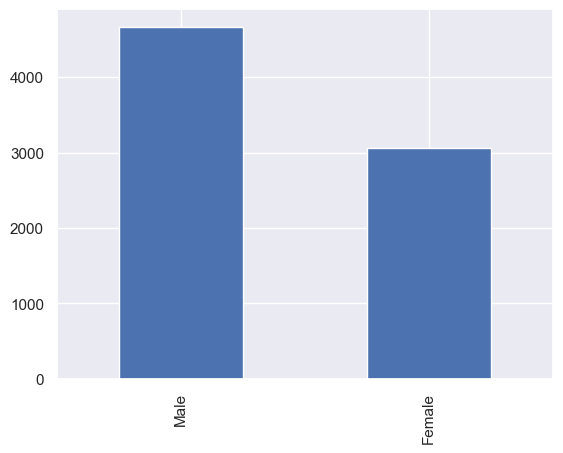

In [32]:
data['Gender'].value_counts().plot(kind='bar')

In [33]:
data['Designation'].value_counts()

Executive         3065
Manager           2676
Senior Manager    1154
AVP                507
VP                 340
Name: Designation, dtype: int64

<Axes: >

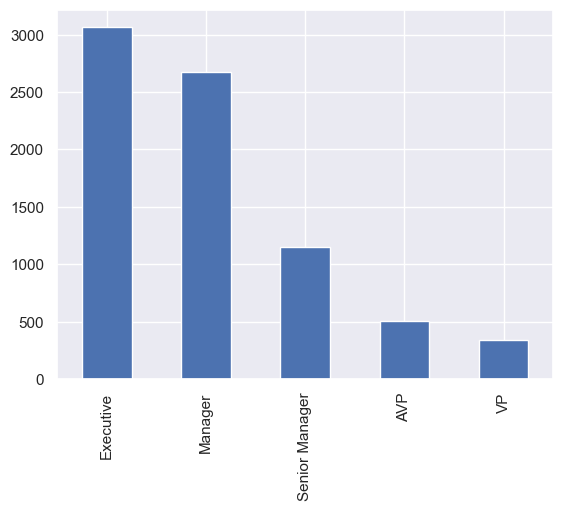

In [34]:
data['Designation'].value_counts().plot(kind='bar')

Excutives are the majority in number than any other designation

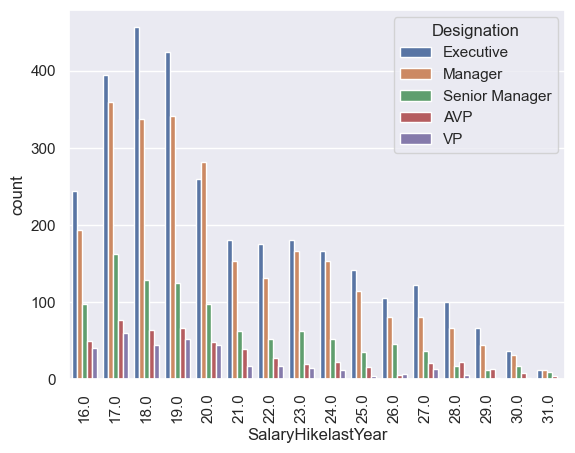

In [35]:
sns.countplot(x=data['SalaryHikelastYear'],hue=data['Designation'])
plt.xticks(rotation=90)
plt.show()

Executives got more salary hike than other designations in the last year

In [36]:
data['MaritalStatus'].value_counts()   ## Here Married and M are same so we need to fix this 

Single      2709
Married     2455
Divorsed    1493
M           1153
Name: MaritalStatus, dtype: int64

<Axes: >

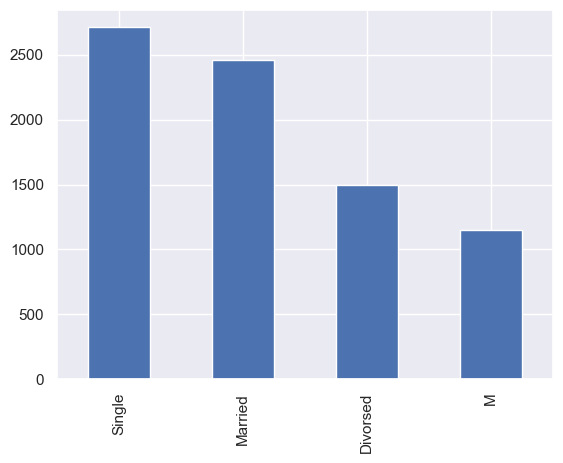

In [37]:
data['MaritalStatus'].value_counts().plot(kind='bar')

In [38]:
data['MaritalStatus'] = data['MaritalStatus'].replace('M','Married')   ## Replacing 'M' with 'Married'

<Axes: >

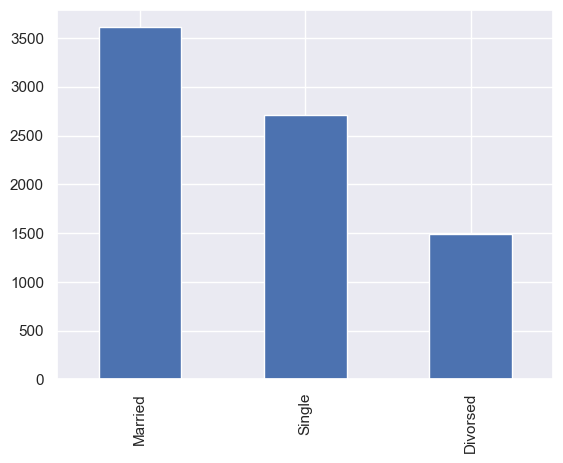

In [39]:
data['MaritalStatus'].value_counts().plot(kind='bar')  

In [40]:
data['TravelProfile'].value_counts()

Rarely    5489
Yes       1580
No         741
Name: TravelProfile, dtype: int64

<Axes: >

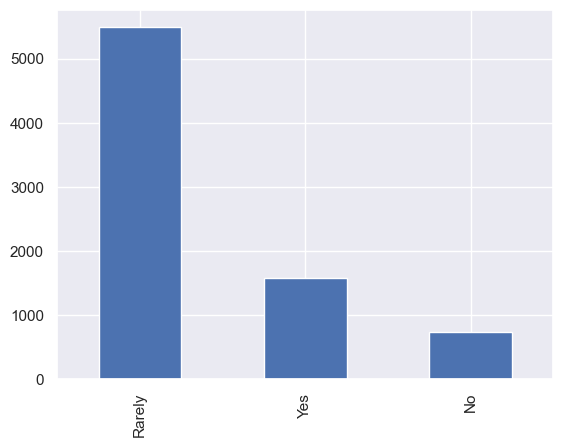

In [41]:
data['TravelProfile'].value_counts().plot(kind='bar')

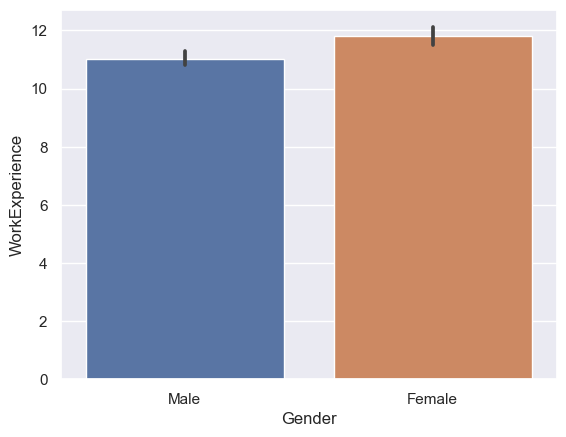

In [42]:
zx= sns.barplot(x=data['Gender'],y=data['WorkExperience'])

Female have more work experience than male

Here,  Age , Department, HomeToWork, gender,  HourlnWeek,Designation, SalaryHikelastYear, WorkExperience, LastPromotion, CurrentProfile, MonthlyIncome has missing values.  
We need to impute missing values rather droping them as percentage of missing values present in the dataset are less than 70 %. 

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7810 entries, 0 to 2629
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          7810 non-null   int64  
 1   Attrition           5180 non-null   float64
 2   Age                 7352 non-null   float64
 3   TravelProfile       7810 non-null   object 
 4   Department          7628 non-null   object 
 5   HomeToWork          7429 non-null   float64
 6   EducationField      7810 non-null   object 
 7   Gender              7734 non-null   object 
 8   HourlnWeek          7387 non-null   float64
 9   Involvement         7810 non-null   int64  
 10  WorkLifeBalance     7810 non-null   int64  
 11  Designation         7742 non-null   object 
 12  JobSatisfaction     7810 non-null   int64  
 13  ESOPs               7810 non-null   int64  
 14  NumCompaniesWorked  7810 non-null   int64  
 15  OverTime            7810 non-null   int64  
 16  Salary

## Null values imputation

Null values imputation: For object we will use mode, for float we will use median to impute the null values 

In [44]:
#Null values imputation for numerical  variable by using median
data['Age'] = data['Age'].fillna(data['Age'].median())

data['HomeToWork'] = data['HomeToWork'].fillna(data['HomeToWork'].median())

data['HourlnWeek'] = data['HourlnWeek'].fillna(data['HourlnWeek'].median())

data['SalaryHikelastYear'] = data['SalaryHikelastYear'].fillna(data['SalaryHikelastYear'].median())

data['WorkExperience'] = data['WorkExperience'].fillna(data['WorkExperience'].median())

data['LastPromotion'] = data['LastPromotion'].fillna(data['LastPromotion'].median())

data['CurrentProfile'] = data['CurrentProfile'].fillna(data['CurrentProfile'].median())

data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())

In [45]:
#Null values imputation for object variable by using mode
data['Department'] = data['Department'].fillna(data['Department'].mode()[0])

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

data['Designation'] = data['Designation'].fillna(data['Designation'].mode()[0])

data['EducationField'] = data['EducationField'].fillna(data['EducationField'].mode()[0]) 

data['TravelProfile'] = data['TravelProfile'].fillna(data['TravelProfile'].mode()[0])

data['MaritalStatus'] = data['MaritalStatus'].fillna(data['MaritalStatus'].mode()[0])

In [46]:
data.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,data_name
0,5110001,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1,...,1,1,1,20.0,7.0,2.0,3.0,Married,18932.0,train
1,5110002,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4,...,0,8,0,20.0,4.0,1.0,3.0,Single,18785.0,train
2,5110003,0.0,31.0,Rarely,Analytics,5.0,Statistics,Female,45.0,5,...,1,3,0,26.0,12.0,1.0,3.0,Single,22091.0,train
3,5110004,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3,...,1,1,0,23.0,5.0,1.0,3.0,Divorsed,20302.0,train
4,5110005,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3,...,1,8,0,21.0,12.0,1.0,9.0,Divorsed,21674.0,train


In [47]:
data.isnull().sum()

EmployeeID               0
Attrition             2630
Age                      0
TravelProfile            0
Department               0
HomeToWork               0
EducationField           0
Gender                   0
HourlnWeek               0
Involvement              0
WorkLifeBalance          0
Designation              0
JobSatisfaction          0
ESOPs                    0
NumCompaniesWorked       0
OverTime                 0
SalaryHikelastYear       0
WorkExperience           0
LastPromotion            0
CurrentProfile           0
MaritalStatus            0
MonthlyIncome            0
data_name                0
dtype: int64

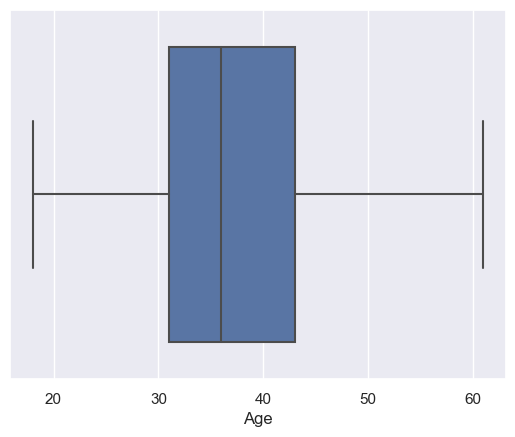

In [48]:
sns.boxplot(x= 'Age', data= data)
plt.show()

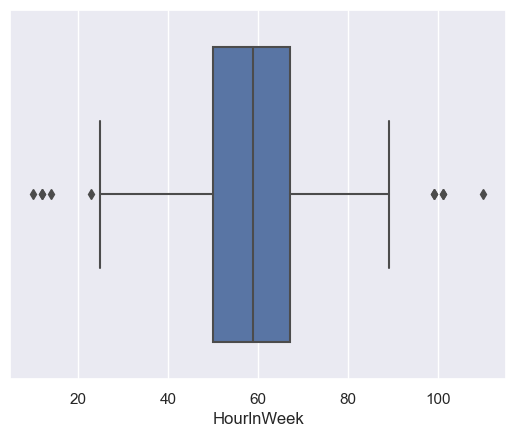

In [49]:
sns.boxplot(x= 'HourlnWeek', data= data)
plt.show()

Q1:  50.0
Q3:  67.0
IQR:  17.0
upper limit:  92.5
lower limit:  41.5


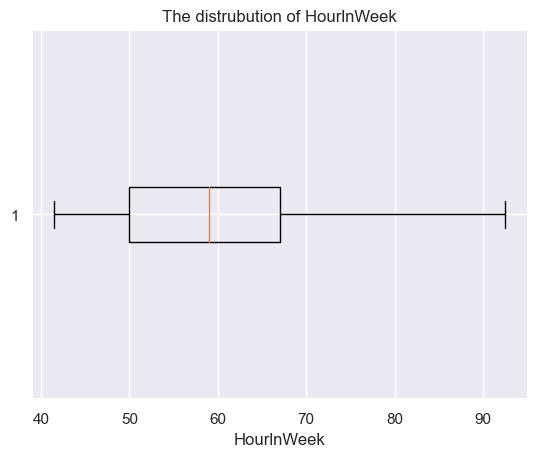

<Figure size 1500x500 with 0 Axes>

In [50]:
Q1 = data['HourlnWeek'].quantile(0.25)    
Q3 = data['HourlnWeek'].quantile(0.75)
IQR=Q3-Q1
upper_limit= Q3+ 1.5*IQR
lower_limit= Q3- 1.5*IQR

print('Q1: ',Q1)
print("Q3: ",Q3)
print('IQR: ',IQR)
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

data['HourlnWeek'] = np.where(data['HourlnWeek']>upper_limit, upper_limit,
                              np.where(data['HourlnWeek']<lower_limit,lower_limit,data['HourlnWeek']))


plt.boxplot(data['HourlnWeek'],vert=False)
plt.title('The distrubution of HourlnWeek')
plt.xlabel('HourlnWeek')
plt.figure(figsize=(15,5))
plt.show()

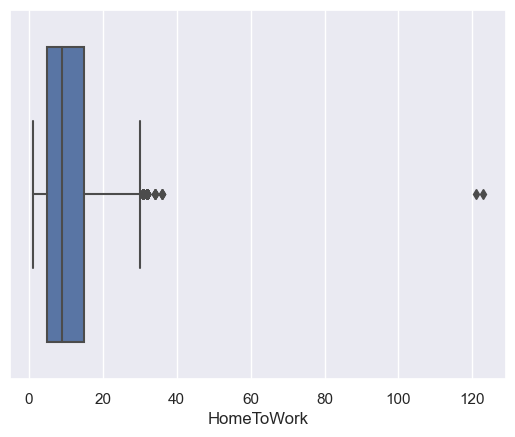

In [51]:
sns.boxplot(x= 'HomeToWork', data= data)
plt.show()

Q1:  5.0
Q3:  15.0
IQR:  10.0
upper limit:  30.0
lower limit:  0.0


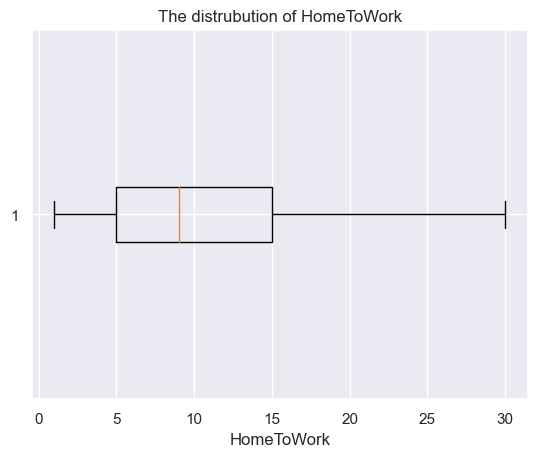

<Figure size 1500x500 with 0 Axes>

In [52]:
Q1 = data['HomeToWork'].quantile(0.25)    
Q3 = data['HomeToWork'].quantile(0.75)
IQR=Q3-Q1
upper_limit= Q3+ 1.5*IQR
lower_limit= Q3- 1.5*IQR

print('Q1: ',Q1)
print("Q3: ",Q3)
print('IQR: ',IQR)
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

data['HomeToWork'] = np.where(data['HomeToWork']>upper_limit, upper_limit,
                              np.where(data['HomeToWork']<lower_limit,lower_limit,data['HomeToWork']))


plt.boxplot(data['HomeToWork'],vert=False)
plt.title('The distrubution of HomeToWork')
plt.xlabel('HomeToWork')
plt.figure(figsize=(15,5))
plt.show()

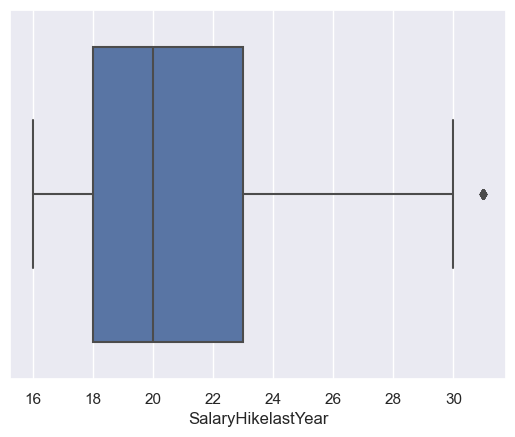

In [53]:
sns.boxplot(x= 'SalaryHikelastYear', data= data)
plt.show()

Q1:  18.0
Q3:  23.0
IQR:  5.0
upper limit:  30.5
lower limit:  15.5


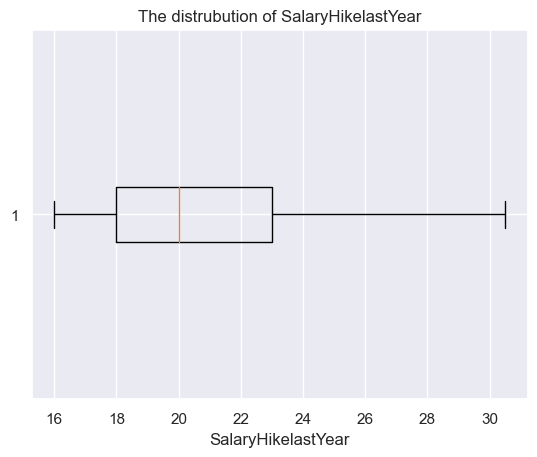

<Figure size 1500x500 with 0 Axes>

In [54]:
Q1 = data['SalaryHikelastYear'].quantile(0.25)    
Q3 = data['SalaryHikelastYear'].quantile(0.75)
IQR=Q3-Q1
upper_limit= Q3+ 1.5*IQR
lower_limit= Q3- 1.5*IQR

print('Q1: ',Q1)
print("Q3: ",Q3)
print('IQR: ',IQR)
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

data['SalaryHikelastYear'] = np.where(data['SalaryHikelastYear']>upper_limit, upper_limit,
                                      np.where(data['SalaryHikelastYear']<lower_limit,lower_limit,data['SalaryHikelastYear']))


plt.boxplot(data['SalaryHikelastYear'],vert=False)
plt.title('The distrubution of SalaryHikelastYear')
plt.xlabel('SalaryHikelastYear')
plt.figure(figsize=(15,5))
plt.show()

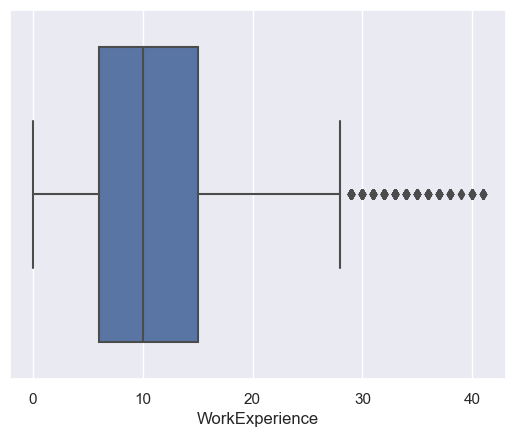

In [55]:
sns.boxplot(x= 'WorkExperience', data= data)
plt.show()

Q1:  6.0
Q3:  15.0
IQR:  9.0
upper limit:  28.5
lower limit:  1.5


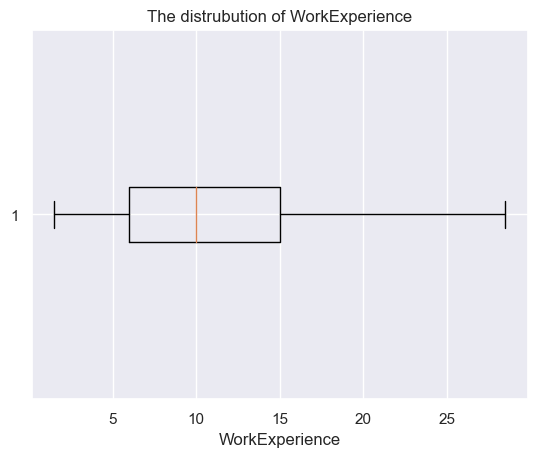

<Figure size 1500x500 with 0 Axes>

In [56]:
Q1 = data['WorkExperience'].quantile(0.25)    
Q3 = data['WorkExperience'].quantile(0.75)
IQR=Q3-Q1
upper_limit= Q3+ 1.5*IQR
lower_limit= Q3- 1.5*IQR

print('Q1: ',Q1)
print("Q3: ",Q3)
print('IQR: ',IQR)
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

data['WorkExperience'] = np.where(data['WorkExperience']>upper_limit, upper_limit,
                                  np.where(data['WorkExperience']<lower_limit,lower_limit,
                                           data['WorkExperience']))


plt.boxplot(data['WorkExperience'],vert=False)
plt.title('The distrubution of WorkExperience')
plt.xlabel('WorkExperience')
plt.figure(figsize=(15,5))
plt.show()

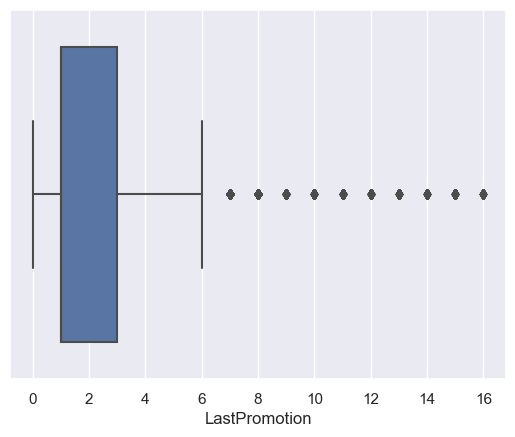

In [57]:
sns.boxplot(x= 'LastPromotion', data= data)
plt.show()

Q1:  1.0
Q3:  3.0
IQR:  2.0
upper limit:  6.0
lower limit:  0.0


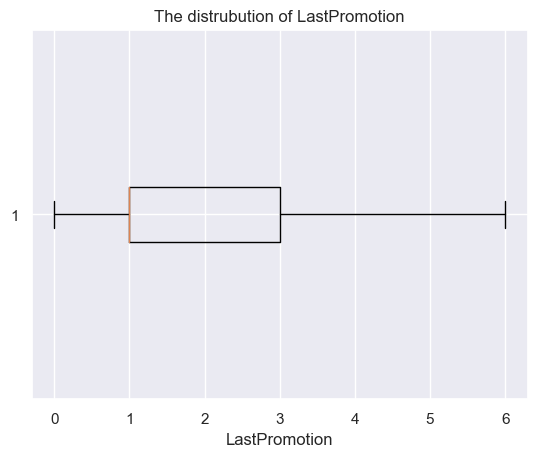

<Figure size 1500x500 with 0 Axes>

In [58]:
Q1 = data['LastPromotion'].quantile(0.25)    
Q3 = data['LastPromotion'].quantile(0.75)
IQR=Q3-Q1
upper_limit= Q3+ 1.5*IQR
lower_limit= Q3- 1.5*IQR

print('Q1: ',Q1)
print("Q3: ",Q3)
print('IQR: ',IQR)
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

data['LastPromotion'] = np.where(data['LastPromotion']>upper_limit, upper_limit,
                                 np.where(data['LastPromotion']<lower_limit,lower_limit,
                                          data['LastPromotion']))


plt.boxplot(data['LastPromotion'],vert=False)
plt.title('The distrubution of LastPromotion')
plt.xlabel('LastPromotion')
plt.figure(figsize=(15,5))
plt.show()

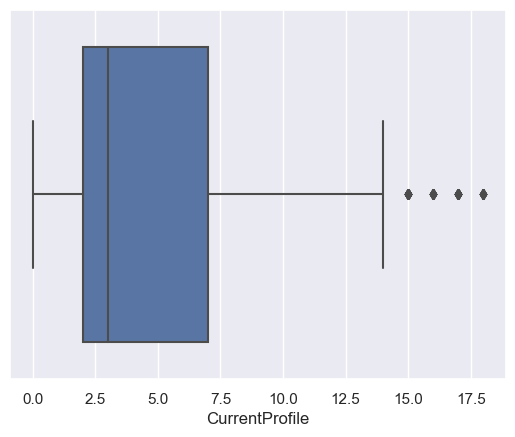

In [59]:
sns.boxplot(x= 'CurrentProfile', data= data)
plt.show()

Q1:  2.0
Q3:  7.0
IQR:  5.0
upper limit:  14.5
lower limit:  -0.5


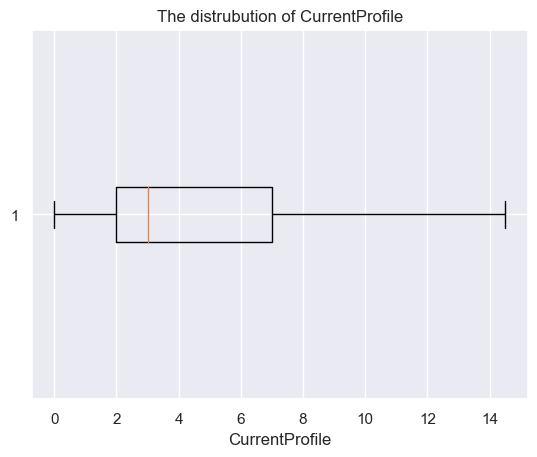

<Figure size 1500x500 with 0 Axes>

In [60]:
Q1 = data['CurrentProfile'].quantile(0.25)    
Q3 = data['CurrentProfile'].quantile(0.75)
IQR=Q3-Q1
upper_limit= Q3+ 1.5*IQR
lower_limit= Q3- 1.5*IQR

print('Q1: ',Q1)
print("Q3: ",Q3)
print('IQR: ',IQR)
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

data['CurrentProfile'] = np.where(data['CurrentProfile']>upper_limit, upper_limit,
                                  np.where(data['CurrentProfile']<lower_limit,lower_limit,data['CurrentProfile']))


plt.boxplot(data['CurrentProfile'],vert=False)
plt.title('The distrubution of CurrentProfile')
plt.xlabel('CurrentProfile')
plt.figure(figsize=(15,5))
plt.show()

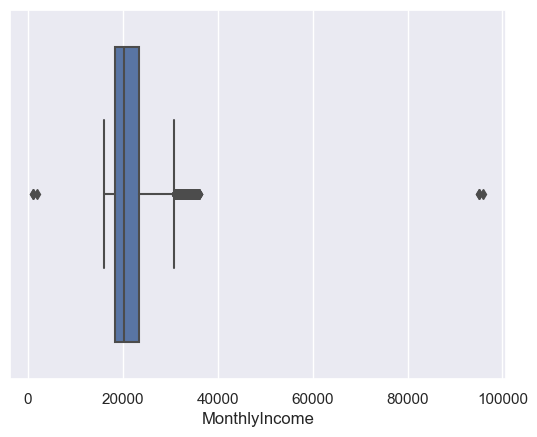

In [61]:
sns.boxplot(x= 'MonthlyIncome', data= data)
plt.show()

Q1:  18398.0
Q3:  23380.75
IQR:  4982.75
upper limit:  30854.875
lower limit:  15906.625


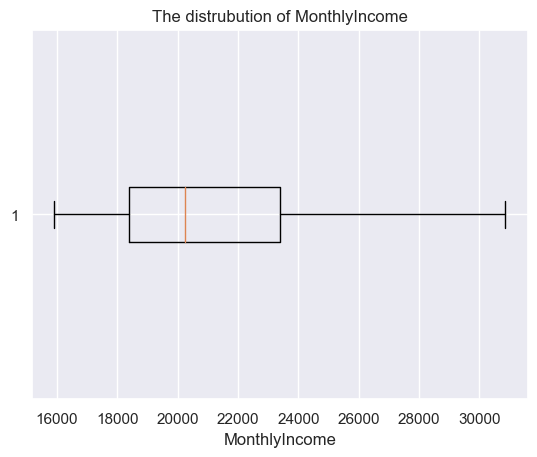

<Figure size 1500x500 with 0 Axes>

In [62]:
Q1 = data['MonthlyIncome'].quantile(0.25)    
Q3 = data['MonthlyIncome'].quantile(0.75)
IQR=Q3-Q1
upper_limit= Q3+ 1.5*IQR
lower_limit= Q3- 1.5*IQR

print('Q1: ',Q1)
print("Q3: ",Q3)
print('IQR: ',IQR)
print('upper limit: ',upper_limit)
print('lower limit: ',lower_limit)

data['MonthlyIncome'] = np.where(data['MonthlyIncome']>upper_limit, upper_limit,
                                  np.where(data['MonthlyIncome']<lower_limit,lower_limit,data['MonthlyIncome']))


plt.boxplot(data['MonthlyIncome'],vert=False)
plt.title('The distrubution of MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.figure(figsize=(15,5))
plt.show()

## Encode object variables 


### Using one hot encoder to encode object variable

In [63]:
data=pd.get_dummies(data, columns = ['Department','Designation','TravelProfile',
                                     'EducationField','Gender','MaritalStatus'], drop_first=True)

In [64]:
data.head()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,...,TravelProfile_Rarely,TravelProfile_Yes,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
0,5110001,0.0,35.0,5.0,69.0,1,1,1,1,1,...,1,0,0,0,0,0,0,1,1,0
1,5110002,1.0,32.0,5.0,62.0,4,3,2,0,8,...,0,1,0,0,0,0,1,0,0,1
2,5110003,0.0,31.0,5.0,45.0,5,3,2,1,3,...,1,0,0,0,0,0,1,0,0,1
3,5110004,0.0,34.0,10.0,41.5,3,2,4,1,1,...,0,1,0,0,0,0,1,0,0,0
4,5110005,0.0,37.0,27.0,49.0,3,4,4,1,8,...,0,0,0,0,0,0,1,0,0,0


In [65]:
train = data[data['data_name']== 'train']    ## Seperate train and test data again after performaing data preprocessing
test = data[data['data_name']== 'test']   ## Test data will use to get the final results 

In [66]:
train.shape

(5180, 33)

In [67]:
train.head()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,...,TravelProfile_Rarely,TravelProfile_Yes,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
0,5110001,0.0,35.0,5.0,69.0,1,1,1,1,1,...,1,0,0,0,0,0,0,1,1,0
1,5110002,1.0,32.0,5.0,62.0,4,3,2,0,8,...,0,1,0,0,0,0,1,0,0,1
2,5110003,0.0,31.0,5.0,45.0,5,3,2,1,3,...,1,0,0,0,0,0,1,0,0,1
3,5110004,0.0,34.0,10.0,41.5,3,2,4,1,1,...,0,1,0,0,0,0,1,0,0,0
4,5110005,0.0,37.0,27.0,49.0,3,4,4,1,8,...,0,0,0,0,0,0,1,0,0,0


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5180 entries, 0 to 5179
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   EmployeeID                        5180 non-null   int64  
 1   Attrition                         5180 non-null   float64
 2   Age                               5180 non-null   float64
 3   HomeToWork                        5180 non-null   float64
 4   HourlnWeek                        5180 non-null   float64
 5   Involvement                       5180 non-null   int64  
 6   WorkLifeBalance                   5180 non-null   int64  
 7   JobSatisfaction                   5180 non-null   int64  
 8   ESOPs                             5180 non-null   int64  
 9   NumCompaniesWorked                5180 non-null   int64  
 10  OverTime                          5180 non-null   int64  
 11  SalaryHikelastYear                5180 non-null   float64
 12  WorkEx

In [69]:
test.shape

(2630, 33)

In [70]:
test.head()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,...,TravelProfile_Rarely,TravelProfile_Yes,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
0,6110001,NaN,18.0,9.0,80.0,3,2,3,1,1,...,0,0,0,0,0,0,0,1,0,1
1,6110002,NaN,20.0,28.0,59.0,1,3,1,1,2,...,1,0,0,0,0,0,1,0,0,1
2,6110003,NaN,50.0,19.0,76.0,3,3,5,0,5,...,1,0,0,0,0,0,0,0,1,0
3,6110004,NaN,32.0,23.0,73.0,5,2,3,0,4,...,1,0,0,0,0,0,1,0,1,0
4,6110005,NaN,39.0,7.0,42.0,4,1,5,1,4,...,1,0,0,0,0,0,0,1,1,0


In [71]:
train['Attrition'] = train['Attrition'].astype('int64')   ## Attrition is in float value, converting it into integer

In [72]:
train

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,...,TravelProfile_Rarely,TravelProfile_Yes,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
0,5110001,0,35.0,5.0,69.0,1,1,1,1,1,...,1,0,0,0,0,0,0,1,1,0
1,5110002,1,32.0,5.0,62.0,4,3,2,0,8,...,0,1,0,0,0,0,1,0,0,1
2,5110003,0,31.0,5.0,45.0,5,3,2,1,3,...,1,0,0,0,0,0,1,0,0,1
3,5110004,0,34.0,10.0,41.5,3,2,4,1,1,...,0,1,0,0,0,0,1,0,0,0
4,5110005,0,37.0,27.0,49.0,3,4,4,1,8,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,5115176,0,36.0,13.0,53.0,3,3,3,0,4,...,1,0,0,0,0,0,0,0,0,1
5176,5115177,0,36.0,9.0,66.0,1,4,4,1,9,...,1,0,0,0,0,0,0,0,0,1
5177,5115178,0,29.0,9.0,62.0,4,2,1,1,6,...,1,0,0,0,0,0,0,0,1,0
5178,5115179,0,26.0,26.0,61.0,3,4,3,0,1,...,1,0,0,0,0,0,1,0,0,0


In [73]:
#sns.pairplot(data=train)
#plt.show()

In [74]:
#plt.figure(figsize=(16,8))
#sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
#plt.show()

In [75]:
train.corr()   ## Correlation table 

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,...,TravelProfile_Rarely,TravelProfile_Yes,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
EmployeeID,1.000000,-0.023067,0.021768,-0.014823,0.009543,0.002321,-0.003441,-0.004581,0.009884,-0.000951,...,0.024157,-0.014042,-0.005848,-0.005975,0.004334,-0.007617,0.020500,-0.002007,-0.020779,-0.002293
Attrition,-0.023067,1.000000,-0.180490,0.090162,0.014734,0.144332,0.013608,0.126745,0.012200,0.049829,...,-0.051362,0.123964,0.090186,0.035813,0.070850,-0.028787,-0.048031,0.048519,-0.165064,0.219068
Age,0.021768,-0.180490,1.000000,0.009985,-0.009426,-0.023155,-0.012026,-0.016401,-0.013094,0.300425,...,0.028447,-0.024953,-0.036517,-0.005621,0.029228,-0.032505,0.014743,-0.036029,0.084422,-0.130322
HomeToWork,-0.014823,0.090162,0.009985,1.000000,0.058380,-0.003797,0.020534,0.013979,0.005373,-0.010744,...,-0.039415,0.013109,-0.029315,0.004607,0.047861,-0.006203,-0.027031,-0.013319,0.035774,-0.020636
HourlnWeek,0.009543,0.014734,-0.009426,0.058380,1.000000,-0.017545,0.008162,0.046462,0.002662,0.005027,...,-0.033764,0.007774,0.002735,-0.026298,-0.001685,-0.040472,0.042245,-0.003009,0.028956,-0.051492
Involvement,0.002321,0.144332,-0.023155,-0.003797,-0.017545,1.000000,0.001419,-0.022173,0.028821,0.007583,...,-0.023369,0.007594,0.013365,-0.008217,0.023692,0.001588,-0.006980,-0.006184,-0.044492,0.055707
WorkLifeBalance,-0.003441,0.013608,-0.012026,0.020534,0.008162,0.001419,1.000000,0.012179,0.001540,-0.006376,...,0.007680,-0.019192,-0.022138,0.011523,-0.001145,0.020071,0.015543,0.020167,0.010317,-0.025556
JobSatisfaction,-0.004581,0.126745,-0.016401,0.013979,0.046462,-0.022173,0.012179,1.000000,-0.008894,0.052492,...,0.034525,-0.037815,0.027922,0.039777,0.011623,-0.008849,-0.039870,-0.033083,-0.050141,0.005011
ESOPs,0.009884,0.012200,-0.013094,0.005373,0.002662,0.028821,0.001540,-0.008894,1.000000,-0.019383,...,-0.010214,0.006186,0.000141,0.011973,0.005062,0.004557,0.006781,0.006088,0.004330,-0.013993
NumCompaniesWorked,-0.000951,0.049829,0.300425,-0.010744,0.005027,0.007583,-0.006376,0.052492,-0.019383,1.000000,...,0.023776,-0.032121,0.010504,0.044173,-0.030694,-0.007708,-0.013396,-0.018352,0.037346,-0.026600


In [76]:
#Splitting the data into IV and DV
x= train.drop(['EmployeeID','data_name','Attrition'],axis=1)   ## Independent variables 
y= train['Attrition']   ## Dependent variables 

In [77]:
x.head(2)

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,TravelProfile_Rarely,TravelProfile_Yes,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
0,35.0,5.0,69.0,1,1,1,1,1,1,20.0,...,1,0,0,0,0,0,0,1,1,0
1,32.0,5.0,62.0,4,3,2,0,8,0,20.0,...,0,1,0,0,0,0,1,0,0,1


In [78]:
y.head(10)

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    1
8    0
9    1
Name: Attrition, dtype: int64

In [79]:
x.describe()

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,TravelProfile_Rarely,TravelProfile_Yes,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
count,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,...,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000,5180.000000
mean,37.040927,10.961004,58.741988,3.226641,3.012741,3.144402,0.490541,3.157336,0.313514,20.626062,...,0.702124,0.202896,0.094015,0.022587,0.116409,0.054826,0.411004,0.606178,0.461004,0.342857
std,8.965977,8.056425,11.404725,0.872431,1.410602,1.342776,0.499959,2.606036,0.463966,3.641419,...,0.457369,0.402194,0.291878,0.148597,0.320746,0.227663,0.492063,0.488643,0.498525,0.474710
min,18.000000,1.000000,41.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,5.000000,50.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,20.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,42.000000,15.000000,67.000000,4.000000,4.000000,4.000000,1.000000,5.000000,1.000000,23.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,30.000000,92.500000,5.000000,5.000000,5.000000,1.000000,21.000000,1.000000,30.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
output_ID= test[['EmployeeID']]   ## It will use later to merge the final attrition output with the employee ID

In [81]:
output_ID

,EmployeeID
0,6110001
1,6110002
2,6110003
3,6110004
4,6110005
...,...
2625,6112626
2626,6112627
2627,6112628
2628,6112629


In [82]:
test = test.drop(['EmployeeID','data_name','Attrition'],axis=1)  

In [83]:
test.isnull().sum()

Age                                 0
HomeToWork                          0
HourlnWeek                          0
Involvement                         0
WorkLifeBalance                     0
JobSatisfaction                     0
ESOPs                               0
NumCompaniesWorked                  0
OverTime                            0
SalaryHikelastYear                  0
WorkExperience                      0
LastPromotion                       0
CurrentProfile                      0
MonthlyIncome                       0
Department_Marketing                0
Department_Sales                    0
Designation_Executive               0
Designation_Manager                 0
Designation_Senior Manager          0
Designation_VP                      0
TravelProfile_Rarely                0
TravelProfile_Yes                   0
EducationField_Engineer             0
EducationField_MBA                  0
EducationField_Marketing Diploma    0
EducationField_Other                0
EducationFie

In [84]:
y.value_counts()

0    3735
1    1445
Name: Attrition, dtype: int64

In [85]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.209302,-0.724138,0.078431,-1.0,-1.0,-1.0,1.0,-0.904762,1.0,-0.448276,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
1,-0.348837,-0.724138,-0.196078,0.5,0.0,-0.5,-1.0,-0.238095,-1.0,-0.448276,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2,-0.395349,-0.724138,-0.862745,1.0,0.0,-0.5,1.0,-0.714286,-1.0,0.379310,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
3,-0.255814,-0.379310,-1.000000,0.0,-0.5,0.5,1.0,-0.904762,-1.0,-0.034483,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,-0.116279,0.793103,-0.705882,0.0,0.5,0.5,1.0,-0.238095,-1.0,-0.310345,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0


In [86]:
test1 = scaler.transform(test)    ## Here, for test data here we use only trasform, not fit.transform to prevent data leakage 
pd.DataFrame(test1).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.000000,-0.448276,0.509804,0.0,-0.5,0.0,1.0,-0.904762,-1.0,-0.862069,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
1,-0.906977,0.862069,-0.313725,-1.0,0.0,-1.0,1.0,-0.809524,1.0,-0.724138,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2,0.488372,0.241379,0.352941,0.0,0.0,1.0,-1.0,-0.523810,1.0,-0.172414,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
3,-0.348837,0.517241,0.235294,1.0,-0.5,0.0,-1.0,-0.619048,1.0,-0.862069,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
4,-0.023256,-0.586207,-0.980392,0.5,-1.0,1.0,1.0,-0.619048,-1.0,-0.448276,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0


In [87]:
# Split the data into train and test 
# Here 80% data use to build the model, 20% data use to test the model

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                random_state=101,stratify=y)

# Model 1: Logistic Regression 

In [89]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression(multi_class= 'ovr')
logit.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [90]:
#Prediction

In [91]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [92]:
pd.DataFrame(y_pred_test).value_counts()

0    815
1    221
dtype: int64

In [93]:
# Evaluation of the modelby using confusion_matrix, classification_report, accuracy_score

In [94]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [95]:
print(confusion_matrix(y_train, y_pred_train))
print('******************************'*4)
print(confusion_matrix(y_test,y_pred_test))

[[2752  236]
 [ 516  640]]
************************************************************************************************************************
[[681  66]
 [134 155]]


In [96]:
print("Training Accuracy Score", accuracy_score(y_train, y_pred_train))
print("**************"*10)
print("Test Accuracy Score", accuracy_score(y_test, y_pred_test))

Training Accuracy Score 0.8185328185328186
********************************************************************************************************************************************
Test Accuracy Score 0.806949806949807


In [97]:
print(classification_report(y_train, y_pred_train))
print("**************"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2988
           1       0.73      0.55      0.63      1156

    accuracy                           0.82      4144
   macro avg       0.79      0.74      0.75      4144
weighted avg       0.81      0.82      0.81      4144

********************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       747
           1       0.70      0.54      0.61       289

    accuracy                           0.81      1036
   macro avg       0.77      0.72      0.74      1036
weighted avg       0.80      0.81      0.80      1036



In [98]:
# K-Fold method to test accuracy 
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit, x_train, y_train, cv=10)
print(accuracy)
print()
print(accuracy.mean())
print()
print(accuracy.max())

[0.81927711 0.79277108 0.78313253 0.81927711 0.8236715  0.79227053
 0.80917874 0.82125604 0.8115942  0.83333333]

0.8105762179151389

0.8333333333333334


In [99]:
# Checking roc_auc_score

In [100]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.7239893831380887

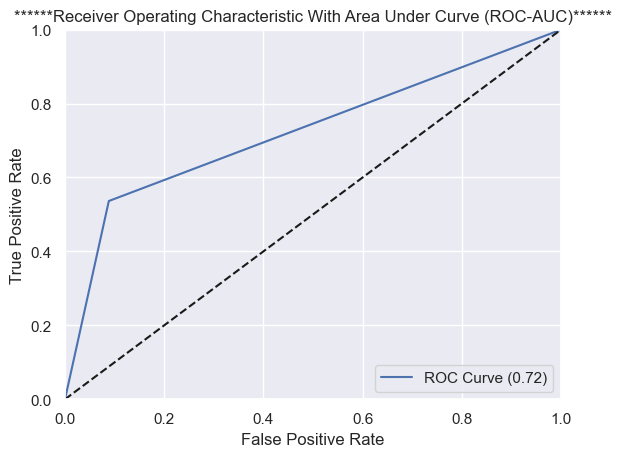

In [101]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

In [102]:
## Predicting our given test data 

In [103]:
final_output= logit.predict(test1)

In [104]:
final=pd.DataFrame(final_output)

In [105]:
final.value_counts()

0    2092
1     538
dtype: int64

In [106]:
final

,0
0,0
1,1
2,0
3,1
4,0
...,...
2625,1
2626,1
2627,0
2628,0


In [107]:
final.columns = ['Attrition']  ## Putting column name

In [108]:
final

,Attrition
0,0
1,1
2,0
3,1
4,0
...,...
2625,1
2626,1
2627,0
2628,0


In [109]:
len(test)

2630

In [110]:
len(final)

2630

In [111]:
final_out_put= pd.concat([output_ID,final],axis=1) ### combining final output file with employee ID. 

In [112]:
final_out_put

,EmployeeID,Attrition
0,6110001,0
1,6110002,1
2,6110003,0
3,6110004,1
4,6110005,0
...,...,...
2625,6112626,1
2626,6112627,1
2627,6112628,0
2628,6112629,0


In [113]:
final_out_put.to_csv("final_results_Attrition.csv")   ## Save the final output file

# Model 2: Bagging Classifier

In [114]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train,y_train)

BaggingClassifier()

In [115]:
y_predict_train_bag = bagging.predict(x_train)
y_predict_test_bag = bagging.predict(x_test)

In [116]:
print(classification_report(y_train,y_predict_train_bag ))
print('**************************************************')
print(classification_report(y_test,y_predict_test_bag ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       1.00      1.00      1.00      1156

    accuracy                           1.00      4144
   macro avg       1.00      1.00      1.00      4144
weighted avg       1.00      1.00      1.00      4144

**************************************************
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       747
           1       0.95      0.96      0.95       289

    accuracy                           0.97      1036
   macro avg       0.97      0.97      0.97      1036
weighted avg       0.97      0.97      0.97      1036



In [117]:
print(accuracy_score(y_train,y_predict_train_bag))
print('**************************************************')
print(accuracy_score(y_test,y_predict_test_bag))

0.999034749034749
**************************************************
0.9739382239382239


In [118]:
final_bagging_output= bagging.predict(test1)

In [119]:
final_bagging_output = pd.DataFrame(final_bagging_output)

In [120]:
final_bagging_output.columns = ['Attrition']

In [121]:
final_bagging_output

,Attrition
0,1
1,1
2,0
3,1
4,0
...,...
2625,0
2626,0
2627,0
2628,1


In [122]:
final_bagging_output = pd.concat([output_ID,final_bagging_output],axis=1)

In [123]:
final_bagging_output

,EmployeeID,Attrition
0,6110001,1
1,6110002,1
2,6110003,0
3,6110004,1
4,6110005,0
...,...,...
2625,6112626,0
2626,6112627,0
2627,6112628,0
2628,6112629,1


In [124]:
final_bagging_output.to_csv("final_bagging_output.csv")  ## Converting results in csv format

# Model 3: Gradient Boosting Classifier Algorithm

In [125]:
from sklearn.ensemble import GradientBoostingClassifier


gdm = GradientBoostingClassifier()
gdm.fit(x_train, y_train)

GradientBoostingClassifier()

In [126]:
y_pred_train_gdm = gdm.predict(x_train)
y_pred_test_gdm = gdm.predict(x_test)

In [127]:
print(classification_report(y_train, y_pred_train_gdm))
print()
print(classification_report(y_test, y_pred_test_gdm))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2988
           1       0.92      0.68      0.78      1156

    accuracy                           0.89      4144
   macro avg       0.90      0.83      0.86      4144
weighted avg       0.90      0.89      0.89      4144


              precision    recall  f1-score   support

           0       0.87      0.96      0.91       747
           1       0.86      0.63      0.73       289

    accuracy                           0.87      1036
   macro avg       0.86      0.79      0.82      1036
weighted avg       0.87      0.87      0.86      1036



In [128]:
print(accuracy_score(y_train, y_pred_train_gdm))
print()
print(accuracy_score(y_test, y_pred_test_gdm))

0.8943050193050193

0.8677606177606177


In [129]:
final_output_gradiant_boost = gdm.predict(test1)

In [130]:
final_output_gradiant_boost = pd.DataFrame(final_output_gradiant_boost)

In [131]:
final_output_gradiant_boost.columns = ['Attrition']

In [132]:
final_output_gradiant_boost

,Attrition
0,1
1,1
2,0
3,1
4,0
...,...
2625,0
2626,0
2627,0
2628,1


# Model 4: XGBoost Classification Algorithm

In [133]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [134]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [135]:
print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       1.00      1.00      1.00      1156

    accuracy                           1.00      4144
   macro avg       1.00      1.00      1.00      4144
weighted avg       1.00      1.00      1.00      4144


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       747
           1       0.95      0.99      0.97       289

    accuracy                           0.98      1036
   macro avg       0.97      0.98      0.98      1036
weighted avg       0.98      0.98      0.98      1036



In [136]:
print(accuracy_score(y_train, y_pred_train_xgb))
print()
print(accuracy_score(y_test, y_pred_test_xgb))

1.0

0.9826254826254827


In [137]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)
print(training_accuracy.mean())

0.9778004772714045


In [138]:
final_output_xgboost = xgb.predict(test1)

In [139]:
final_output_xgboost = pd.DataFrame(final_output_xgboost)

In [140]:
final_output_xgboost.columns = ['Attrition']

In [141]:
final_output_xgboost

,Attrition
0,1
1,0
2,1
3,1
4,0
...,...
2625,0
2626,0
2627,0
2628,1


# Model 5: Random Forest Classification Algorithm

In [142]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(x_train, y_train)

RandomForestClassifier()

In [143]:
y_pred_train_rfm = rfm.predict(x_train)
y_pred_test_rfm = rfm.predict(x_test)

In [144]:
print(classification_report(y_train, y_pred_train_rfm))
print()
print(classification_report(y_test, y_pred_test_rfm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       1.00      1.00      1.00      1156

    accuracy                           1.00      4144
   macro avg       1.00      1.00      1.00      4144
weighted avg       1.00      1.00      1.00      4144


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       747
           1       0.97      0.98      0.97       289

    accuracy                           0.99      1036
   macro avg       0.98      0.98      0.98      1036
weighted avg       0.99      0.99      0.99      1036



In [145]:
print(accuracy_score(y_train, y_pred_train_rfm))
print()
print(accuracy_score(y_test, y_pred_test_rfm))

1.0

0.9855212355212355


In [146]:
output_rf=rfm.predict(test1)
output_rf

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [147]:
output_rf = pd.DataFrame(output_rf)

In [148]:
output_rf.columns = ['Attrition']

In [149]:
output_rf

,Attrition
0,1
1,0
2,0
3,1
4,0
...,...
2625,0
2626,0
2627,0
2628,1


Conclusion: In the present data set, I have used several steps in the data pre-processing stage where I checked null values and impute numerical values with median and object values with mode. I have also fixed some of the data by replacing the wrong values with the right ones. I have used box plots to treat outliers. Here I have built 5 models like Logistic regression,  Bagging classifier, Gradient boosting classifier algorithm, XG Boost classification, and Random forest classification algorithm that excellently predict the attrition of the employees which is basically a classification problem. After comparing all the accuracies from 6 models  I found that XG Boost and Random Forest showed 100% accuracy in the training data set that showing the sign of overfitting. However, Logistic regression, Bagging, and Gradient boosting show excellent accuracy of more than 70%.  